# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li>
    <a href="#wrangling">Data Wrangling</a>
    <ul>
        <li><a href="#properties">General Properties</li>
        <li><a href="#cleaning">Data Cleaning</li>
    </ul>
</li>
<li>
    <a href="#eda">Exploratory Data Analysis</a>
    <ul>
        <li><a href="#q1">Is runtime increasing or decreasing over time?</li>
        <li><a href="#q2">Which genres are most popular from year to year?</li>
        <li><a href="#q3">What kinds of properties are associated with movie that have high revenues?</li>
    </ul>
</li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction  

I'm going to inspect some features of data from TMDb.  
For example:
* I feel movie runtime is increasing these days. Is it correct?  
* Did movies with high popularity or high budget get high revenue?  
* Who is the movie star influencing audiences strongly?  

Now let's find out runtime change and most popular genres, some correlations between revenue and other properties, or something else.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling


<a id='properties'></a>
### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

#### Data Types

In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

#### NaN Data

In [5]:
for col in df.columns:
    percent = df[col].isnull().sum() / df.shape[0] * 100
    if percent > 0:
        msg = "column: {col:>20}\t Percent of NaN value: {percent:.2f}%".format(col=col, percent=percent)
        print(msg)

column:              imdb_id	 Percent of NaN value: 0.09%
column:                 cast	 Percent of NaN value: 0.70%
column:             homepage	 Percent of NaN value: 72.98%
column:             director	 Percent of NaN value: 0.40%
column:              tagline	 Percent of NaN value: 25.99%
column:             keywords	 Percent of NaN value: 13.74%
column:             overview	 Percent of NaN value: 0.04%
column:               genres	 Percent of NaN value: 0.21%
column: production_companies	 Percent of NaN value: 9.48%


#### Errant Data

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


* The max of popularity is too high compared to the others of that.
* The max of runtime is weird. TV series could have been included to this data set.
* Mins of budget, revenue, runtime, budget_adj and revenue_adj are zero. They are possibly errant.

#### Duplicated Data

In [7]:
df.duplicated().sum()

1

<a id='cleaning'></a>
### Data Cleaning  
  
  #### Drop duplicates

In [8]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

#### Drop columns not relevant to questions directly

In [9]:
columns_dropped = ['id', 'imdb_id', 'original_title', 'tagline', 'overview']
df.drop(columns=columns_dropped, axis=1, inplace=True)

#### Type Casting: release_date from string to datetime

In [10]:
# M/D/YY to YYYY-m-d
df['release_date'] = df[['release_date', 'release_year']].apply(
    lambda x: "{y}-{m}-{d}".format(y=str(x[1]), m=x[0].split('/')[0], d=x[0].split('/')[1]), axis=1)

In [11]:
df['release_date'].tail()

10860     1966-6-15
10861    1966-12-21
10862      1966-1-1
10863     1966-11-2
10864    1966-11-15
Name: release_date, dtype: object

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].tail()

10860   1966-06-15
10861   1966-12-21
10862   1966-01-01
10863   1966-11-02
10864   1966-11-15
Name: release_date, dtype: datetime64[ns]

#### Get DataFrame without rows that have zero revenue

In [13]:
zero_revenue_indexes = df[df['revenue'] == 0].index
zero_revenue_adj_indexes = df[df['revenue_adj'] == 0].index

In [14]:
(zero_revenue_indexes == zero_revenue_adj_indexes).all()

True

if revenue is zero, revenue_adj is also zero.

In [15]:
df_nonzero_revenue = df.drop(df[df['revenue'] == 0].index)

I'm going to use this dataframe to inspect the relation between revenue and other columns.

#### Split `'|'` joined strings into individual rows

In [16]:
def split_into_rows(col, df):
    df_na_dropped = df.dropna(subset=[col])
    col_split = df_na_dropped[col].str.split('|').apply(pd.Series).stack().reset_index(level= 1, drop=True)
    col_split.name = col
    df_na_dropped.drop(col, axis=1, inplace=True)
    return pd.concat([df_na_dropped, col_split], axis=1)

##### Genres

In [17]:
df_genre = split_into_rows('genres', df)[['release_year','genres', 'popularity']]

In [18]:
df_genre.head()

,release_year,genres,popularity
0,2015,Action,32.985763
0,2015,Adventure,32.985763
0,2015,Science Fiction,32.985763
0,2015,Thriller,32.985763
1,2015,Action,28.419936


##### Cast

In [19]:
col_name = 'cast'
df_cast = split_into_rows(col_name, df_nonzero_revenue)[[col_name, 'revenue', 'revenue_adj']]

In [20]:
df_cast.head()

,cast,revenue,revenue_adj
0,Chris Pratt,1513528810,1.392446e+09
0,Bryce Dallas Howard,1513528810,1.392446e+09
0,Irrfan Khan,1513528810,1.392446e+09
0,Vincent D'Onofrio,1513528810,1.392446e+09
0,Nick Robinson,1513528810,1.392446e+09


##### Director

In [21]:
col_name = 'director'
df_director = split_into_rows(col_name, df_nonzero_revenue)[[col_name, 'revenue', 'revenue_adj']]

In [22]:
df_director.head()

,director,revenue,revenue_adj
0,Colin Trevorrow,1513528810,1.392446e+09
1,George Miller,378436354,3.481613e+08
2,Robert Schwentke,295238201,2.716190e+08
3,J.J. Abrams,2068178225,1.902723e+09
4,James Wan,1506249360,1.385749e+09


##### Production Companies

In [23]:
col_name = 'production_companies'
df_PCs = split_into_rows(col_name, df_nonzero_revenue)[[col_name, 'revenue', 'revenue_adj']]

In [24]:
df_PCs.head(6)

,production_companies,revenue,revenue_adj
0,Universal Studios,1513528810,1.392446e+09
0,Amblin Entertainment,1513528810,1.392446e+09
0,Legendary Pictures,1513528810,1.392446e+09
0,Fuji Television Network,1513528810,1.392446e+09
0,Dentsu,1513528810,1.392446e+09
1,Village Roadshow Pictures,378436354,3.481613e+08


<a id='eda'></a>
## Exploratory Data Analysis  
  
<a id='q1'></a>
### Is runtime increasing or decreasing over time?

In [25]:
100 * df[df['runtime'] > 180]['release_year'].count() / df['release_year'].count()

1.1780947998159226

I can't get rid of data that's not about movie exactly. But Most of movies don't last over 180 minutes. Besides, the proportion over 180 runtime is little. So, it would be better to see the flow without them.

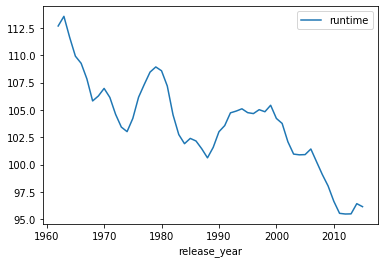

In [26]:
df[df['runtime'] <= 180][['release_year', 'runtime']].groupby('release_year').mean().rolling(window=3).mean().plot();

<a id='q2'></a>
### Which genres are most popular from year to year?

In [27]:
yearly_genres_popularities = df_genre[['genres', 'popularity', 'release_year']]\
.groupby(['release_year', 'genres']).mean()
yearly_genres_popularities.head()

popularity
release_year genres               
1960         Action       0.590724
             Adventure    0.700981
             Comedy       0.396000
             Crime        0.346480
             Drama        0.566305

In [28]:
yearly_most_popular_genre = yearly_genres_popularities.groupby(level=0, group_keys=False)\
.apply(lambda x: x.sort_values(by='popularity', ascending=False).head(1)) # sort each group and take the first element

# cleaning
yearly_most_popular_genre.drop('popularity', axis=1, inplace=True)
yearly_most_popular_genre.reset_index(level=1, inplace=True)
yearly_most_popular_genre.rename(columns={'genres': 'most_popular_genre'}, inplace=True)
yearly_most_popular_genre.index.rename('year', inplace=True)

In [29]:
yearly_most_popular_genre

,most_popular_genre
year,
1960,Thriller
1961,Animation
1962,Adventure
1963,Animation
1964,War
1965,Music
1966,Animation
1967,Animation
1968,Mystery


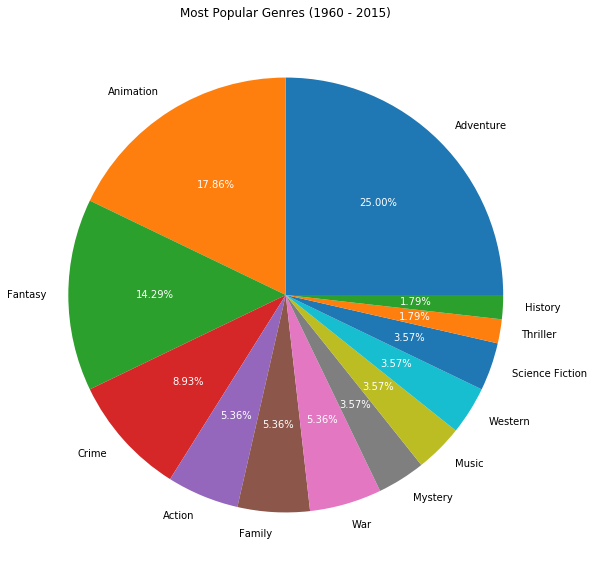

In [30]:
most_popular_genres_counts = yearly_most_popular_genre['most_popular_genre'].value_counts()
plt.figure(figsize=(10, 10))
_, _, autotexts = plt.pie(most_popular_genres_counts, labels=most_popular_genres_counts.index, autopct='%.2f%%');
for autotext in autotexts:
    autotext.set_color('w')
plt.title('Most Popular Genres (1960 - 2015)');

<a id='q3'></a>
### What kinds of properties are associated with movie that have high revenues?  
  
#### Revenue average by homepage existence

In [31]:
mask = df_nonzero_revenue['homepage'].notna()
homepage_1 = df_nonzero_revenue['homepage'][mask].apply(lambda x: 1)
homepage_0 = df_nonzero_revenue['homepage'][~mask].apply(lambda x: 0)
df_nonzero_revenue['homepage'] = pd.concat([homepage_1, homepage_0]).sort_index()

I encoded `homepage` for classification, which is 0 when the homepage is NaN and 0 if any url.

In [32]:
df_nonzero_revenue['homepage'][18:27]

18    0
19    1
20    1
21    0
22    1
23    1
24    1
25    1
26    0
Name: homepage, dtype: int64

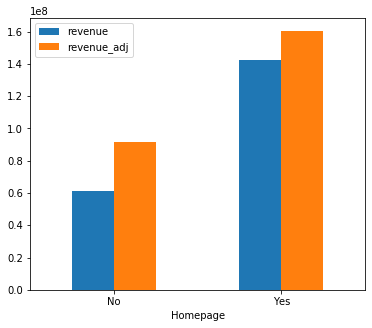

In [33]:
f, ax = plt.subplots(1, 1, figsize=(6, 5))
revenue_avg_by_homepage = df_nonzero_revenue[['homepage', 'revenue', 'revenue_adj']].groupby('homepage').mean()
revenue_avg_by_homepage.plot(kind='bar', ax=ax);
plt.xlabel('Homepage');
plt.xticks([0, 1], ['No', 'Yes'], rotation='horizontal');

#### Cast to possibly contribute to having high revenues

In [34]:
cast_counts = df_cast['cast'].value_counts()
cast_counts.tail()

Alan Ritchson           1
Patricia Tallman        1
Gemmenne de la PeÃ±a    1
Petchtai Wongkamlao     1
Sarah Drew              1
Name: cast, dtype: int64

In [35]:
cast_counts.describe()

count    8460.000000
mean        2.847281
std         4.383370
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        60.000000
Name: cast, dtype: float64

There are so many people who act in few films in data. So I'm going to focus on peope who act in ten films at least.

In [36]:
act_few = cast_counts[cast_counts < 10].index
act_many = df_cast.groupby('cast').mean()['revenue_adj'].drop(act_few).sort_values(ascending=False)
act_many.head(15)

cast
Daniel Radcliffe      7.095902e+08
Rupert Grint          6.965325e+08
Emma Watson           6.774106e+08
Orlando Bloom         5.749915e+08
Ian McKellen          5.419577e+08
Julie Andrews         5.112549e+08
Harrison Ford         4.078745e+08
Sam Worthington       4.024541e+08
Denis Leary           3.986636e+08
Will Smith            3.887821e+08
Michelle Rodriguez    3.886769e+08
Liv Tyler             3.824579e+08
Mike Myers            3.711374e+08
Richard Dreyfuss      3.664255e+08
Leonardo DiCaprio     3.444301e+08
Name: revenue_adj, dtype: float64

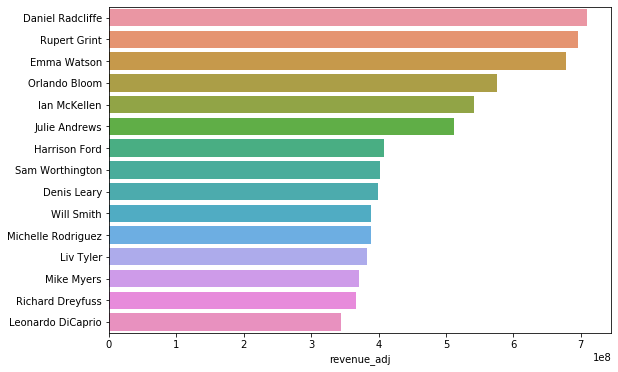

In [37]:
plt.figure(figsize=(9, 6))
sns.barplot(y=act_many.index.values[:15], x=act_many[:15]);

#### Revenue vs budget, popularity, vote_average, vote_count

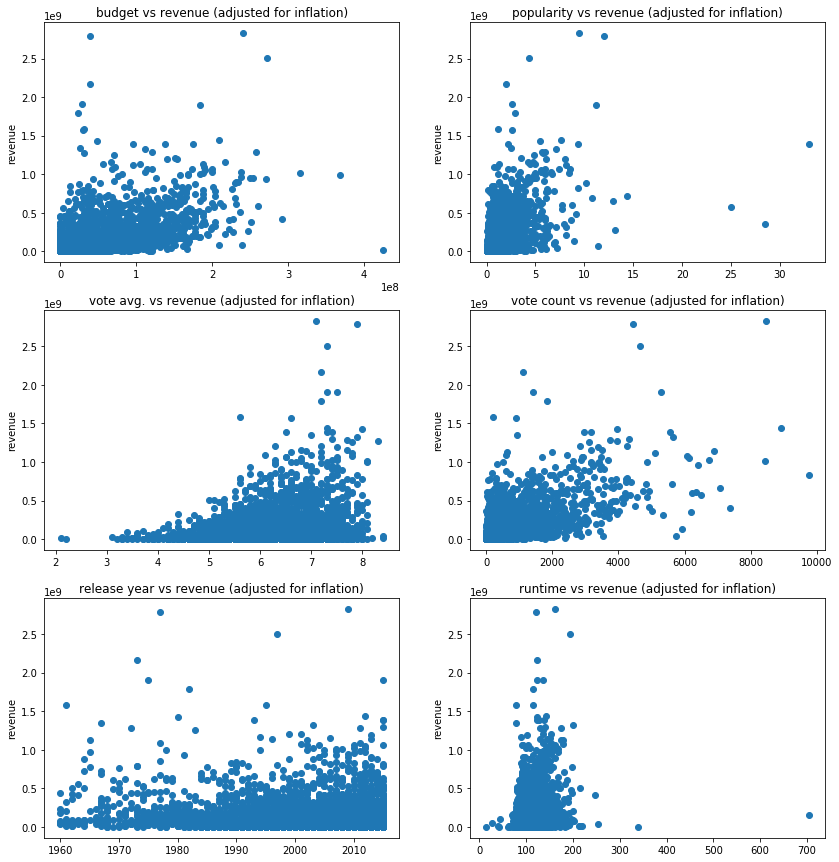

In [38]:
f, axs = plt.subplots(3, 2, figsize=(14, 15))
axs[0, 0].set_title('budget vs revenue (adjusted for inflation)')
axs[0, 0].set_ylabel('revenue')
axs[0, 0].scatter(x='budget_adj', y='revenue_adj', data=df_nonzero_revenue);
axs[0, 1].set_title('popularity vs revenue (adjusted for inflation)')
axs[0, 1].set_ylabel('revenue')
axs[0, 1].scatter(x='popularity', y='revenue_adj', data=df_nonzero_revenue);
axs[1, 0].set_title('vote avg. vs revenue (adjusted for inflation)')
axs[1, 0].set_ylabel('revenue')
axs[1, 0].scatter(x='vote_average', y='revenue_adj', data=df_nonzero_revenue);
axs[1, 1].set_title('vote count vs revenue (adjusted for inflation)')
axs[1, 1].set_ylabel('revenue')
axs[1, 1].scatter(x='vote_count', y='revenue_adj', data=df_nonzero_revenue);
axs[2, 0].set_title('release year vs revenue (adjusted for inflation)')
axs[2, 0].set_ylabel('revenue')
axs[2, 0].scatter(x='release_year', y='revenue_adj', data=df_nonzero_revenue);
axs[2, 1].set_title('runtime vs revenue (adjusted for inflation)')
axs[2, 1].set_ylabel('revenue')
axs[2, 1].scatter(x='runtime', y='revenue_adj', data=df_nonzero_revenue);

#### popularity without outliers vs revenue

In [39]:
sep_popularity = 5
print(df['popularity'][df['popularity'] <= sep_popularity].count())
print(df['popularity'][df['popularity'] > sep_popularity].count())

10780
85


Few popularities are over 5.

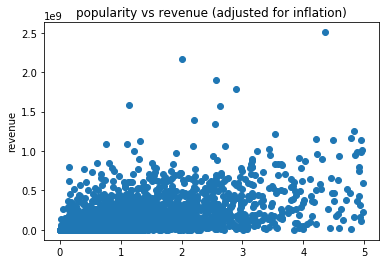

In [40]:
plt.title('popularity vs revenue (adjusted for inflation)')
plt.ylabel('revenue')
plt.scatter(x='popularity', y='revenue_adj', data=df_nonzero_revenue[df_nonzero_revenue['popularity'] < sep_popularity]);

#### Average change in revenue over time

In [41]:
sep_year = 1980
print(df_nonzero_revenue['release_year'][df_nonzero_revenue['release_year'] < sep_year].count())
print(df_nonzero_revenue['release_year'][df_nonzero_revenue['release_year'] >= sep_year].count())

259
4590


Most of movies are released since 1980.

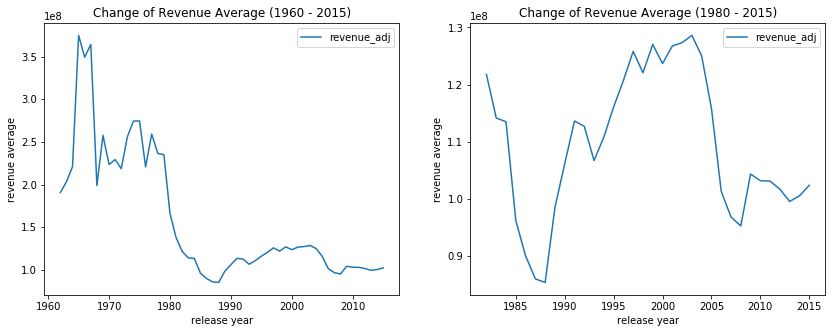

In [42]:
f, ax = plt.subplots(1, 2, figsize=(14, 5))
df_nonzero_revenue[['release_year', 'revenue_adj']].groupby('release_year').mean().rolling(window=3).mean().plot(ax=ax[0])
ax[0].set_title('Change of Revenue Average (1960 - 2015)');
ax[0].set_xlabel('release year');
ax[0].set_ylabel('revenue average');
ax = df_nonzero_revenue[['release_year', 'revenue_adj']][df_nonzero_revenue['release_year'] >= sep_year].groupby('release_year').mean().rolling(window=3).mean().plot(ax=ax[1])
ax.set_title('Change of Revenue Average ({sep_year} - 2015)'.format(sep_year=sep_year));
ax.set_xlabel('release year');
ax.set_ylabel('revenue average');

It seems that the revenue on average has been decreasing from 1960 to 2015. However, if we look in detail from 1980 to 2015, the period in which most of films are released, that is not true.

<a id='conclusions'></a>
## Conclusions

* Runtime have been steadily decreasing.  
* Adventure, Animation, Fantasy are most popular genres, which together comprise over 50 percent of top popular genre from 1960 to 2015. 
* homepage and revenue seem to have positive correlation, not causation.
* vote_average and revenue could have positive correlation.
* Revenue seem to be independent of budget, vote_count, release_year, runtime, and even popularity,  
* Daniel Radcliffe, Rupert Grint, and Emma Watson (WOW! Harry Potter Trio!) are likely to contribute to having high revenues.

### Limitations

* TV series data is included in this dataset. I arbitrarily split them by runtime.  
* There are too many NaN value in homepage column. And I'm not sure whether the homepages are never made or missing from this dataset. 
* Data with 0 revenue is so many that the result about the correlation with revenue is not much precise.  
* The 'popularity' could not be accurate or gained objectively because it's only from the users of TMDb website.